<h1><font color="#113D68" size=5>TINTOlib: Converting Tidy Data into Synthetic Images</font></h1>



<h1><font color="#113D68" size=6>Template Multiclass Classification problem with a Hibryd Networks (CNN+MLP)</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo-Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>
<font color="#113D68" size=3>Jiayun Liu</font><br>
</div>

---

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
More information about [Manuel Castillo-Cara](https://www.manuelcastillo.eu/)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
More information about [Raúl García-Castro](http://www.garcia-castro.com/)

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Licencia</font></h2>

<p><small><small>Improving Deep Learning by Exploiting Synthetic Images Copyright 2024 Manuel Castillo Cara.</p>
<p><small><small> Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at </p>
<p><small><small> <a href="https://www.apache.org/licenses/LICENSE-2.0">https://www.apache.org/licenses/LICENSE-2.0</a> </p>
<p><small><small> Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License. </p>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Index</font></h2>

* [0. Context](#section0)
* [1. Description](#section1)
    * [1.1. Main Features](#section12)
    * [1.2. Citation](#section12)
* [2. Libraries](#section2)
* [3. Data processing](#section3)
    * [3.1. Read images](#section31)
    * [3.2. Data Curation](#section32)
* [4. Pre-modelling phase](#section4)
    * [4.1. Resize images](#section41)
    * [4.2. Iteradores](#section42)
* [5. Modelling with CNN](#section5)
    * [5.1. CNN](#section51)
    * [5.2. Compile and fit](#section52)
    * [5.3. Results](#section53)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Context</font>

This is a tutorial on how to read the images created by TINTO and pass them to a very simple pretrained Convolutional Neural Network (CNN). The images must already be created by the TINTO software. See the documentation in GITHUB for how to create the images from tabular data.

Remember that when using CNN you can set the training to be done with GPUs to improve performance.

Architecture to develop:

<figure><center>
  <img src="../img/HybridCNN.png" width="700" height="450" alt="Gráfica">
  <figcaption><blockquote>Hybrid Neural Network with CNN for the sythetic images and MLP for the tabular data.</a></blockquote></figcaption>
</center></figure>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [Information Fusion Journal](https://doi.org/10.1016/j.inffus.2022.10.011)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
See the paper from [SoftwareX](https://doi.org/10.1016/j.softx.2023.101391)

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTO in [GitHub](https://github.com/oeg-upm/TINTO)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Description</font>

The growing interest in the use of algorithms-based machine learning for predictive tasks has generated a large and diverse development of algorithms. However, it is widely known that not all of these algorithms are adapted to efficient solutions in certain tidy data format datasets. For this reason, novel techniques are currently being developed to convert tidy data into images with the aim of using Convolutional Neural Networks (CNNs). TINTO offers the opportunity to convert tidy data into images through the representation of characteristic pixels by implementing two dimensional reduction algorithms: PCA and _t_-SNE. Our proposal also includes a blurring technique, which adds more ordered information to the image and can improve the classification task in CNNs.

---
<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Main Features</font>

- Supports all CSV data in **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
- For now, the algorithm converts tabular data for binary and multi-class classification problems into machine learning.
- Input data formats:
    - **Tabular files**: The input data must be in **[CSV](https://en.wikipedia.org/wiki/Comma-separated_values)**, taking into account the **[Tidy Data](https://www.jstatsoft.org/article/view/v059i10)** format.
    - **Tidy Data**: The **target** (variable to be predicted) should be set as the last column of the dataset. Therefore, the first columns will be the features.
    - All data must be in numerical form. TINTO does not accept data in string or any other non-numeric format.
- Two dimensionality reduction algorithms are used in image creation, **[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)** and **[*t*-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)** from the Scikit-learn Python library.
- The synthetic images to be created will be in black and white, i.e. in 1 channel.
- The synthetic image **dimensions** can be set as a parameter when creating them.
- The synthetic images can be created using **characteristic pixels** or **blurring** painting technique (expressing an overlap of pixels as the **maximum** or **average**).
- Runs on **Linux**, **Windows** and **macOS** systems.
- Compatible with **[Python](https://www.python.org/)** 3.7 or higher.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Libraries</font>

The first thing we need to do is to declare the libraries

<a id="section21"></a>
# <font color="#004D7F" size=5> 2.1. System setup</font>

Before installing the libraries you must have the `mpi4py` package installed on the native (Linux) system. This link shows how to install it: 
- Link: [`mpi4py` in Linux](https://www.geeksforgeeks.org/how-to-install-python3-mpi4py-package-on-linux/)

For example, in Linux:

```
    sudo apt-get install python3
    sudo apt install python3-pip
    sudo apt install python3-mpi4py
```

If you are in Windows, Mac or, also, Linux, you can install from PyPI if you want:
```
    sudo pip3 install mpi4py
```

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Note that you must **restart the kernel or the system** so that it can load the libraries. 

Now, once you have installed `mpi4py` you can install the PyPI libraries and dependences.

In [ ]:
#!pip install torchmetrics pytorch_lightning TINTOlib imblearn keras_preprocessing mpi4py tifffile tqdm

In [1]:
import os
import random
import pandas as pd
import numpy as np
from tqdm import tqdm
#import cv2
import gc
import matplotlib.pyplot as plt
#import openslide
#from openslide.deepzoom import DeepZoomGenerator
import tifffile as tifi
import sklearn
import tensorflow as tf
import seaborn as sns
from PIL import Image

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import vgg16, vgg19, resnet50, mobilenet, inception_resnet_v2, densenet, inception_v3, xception, nasnet, ResNet152V2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, InputLayer, LayerNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adamax
from tensorflow.keras import layers, models, Model
from tensorflow.keras.losses import MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.layers import Input, Activation,MaxPooling2D, Concatenate, concatenate
from keras.utils import plot_model

from torchmetrics import MeanAbsolutePercentageError
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

import pytorch_lightning as pl
from pytorch_lightning.loggers  import TensorBoardLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
#from imblearn.over_sampling import RandomOverSampler

#Models of TINTOlib
from TINTOlib.barGraph import BarGraph
from TINTOlib.combination import Combination
from TINTOlib.distanceMatrix import DistanceMatrix
from TINTOlib.igtd import IGTD
from TINTOlib.refined import REFINED
from TINTOlib.supertml import SuperTML
from TINTOlib.tinto import TINTO

SEED = 64
# SET RANDOM SEED FOR REPRODUCIBILITY
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
#torch.cuda.manual_seed_all(SEED)
#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_17788/1816183973.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/manwest/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. Data processing</font>

The first thing to do is to read all the images created by TINTO. TINTO creates a folder which contains subfolders corresponding to each target that has the problem. Each image corresponds to a sample of the original dataset.

<a id="section31"></a>
# <font color="#004D7F" size=5> 3.1. Create images with TINTOlib</font>

In [2]:
#Select the model and the parameters
problem_type = "supervised"
#problem_type = "regression"
pixel = 20
## scale_up True guarda como el original 369x369; False es una característica por pixel; SIEMPRE FALSE
#image_model = REFINED(problem=problem_type, random_seed=SEED, zoom=13)
#image_model = TINTO(problem= problem_type,blur=True, option='maximum', pixels=pixel, seed=SEED)
# scale sería [7,4] porque hay 26 variables (para 24 pixeles); 
image_model = IGTD(problem= problem_type, random_seed=SEED, scale=[7,4], zoom=1)
#image_model = BarGraph(problem= problem_type)
#image_model = DistanceMatrix(problem= problem_type)
#image_model = Combination(problem= problem_type)
# SuperTML si especificamos 5 columnas para 25 variables (tened en cuenta las viarables que haya en el dataset)
#image_model = SuperTML(problem= problem_type, columns=5)

#Define the dataset path and the folder where the images will be saved
results_folder = "../Results/iris_Tinto"
dataset_path = "../Datasets/iris.csv"
images_folder = "../Synthetic_images/iris_Tinto"

---
<a id="section32"></a>
# <font color="#004D7F" size=5> 3.2. Read the dataset</font>

In this part, we proceed to read the dataset according to the path specified above and also standardize the name that the target will have.

In [5]:
df = pd.read_csv(dataset_path)
df.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


In [ ]:
# Select all the attributes to normalize
columns_to_normalize = df.columns[:-1]


# Normalize between 0 and 1
df_normalized = (df[columns_to_normalize] - df[columns_to_normalize].min()) / (df[columns_to_normalize].max() - df[columns_to_normalize].min())

# Combine the attributes and the label
df_normalized = pd.concat([df_normalized, df[df.columns[-1]]], axis=1)

df_normalized.head(2)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1


---
<a id="section33"></a>
# <font color="#004D7F" size=5> 3.3. Generate images</font>

Now we can generate the images with the `generateImages()` generic function. Likewise, we create a dataset that will have the path of each of the samples with the corresponding image created for it. 

Note that each image is created based on a row, therefore, each numerical sample of the dataset will correspond to a particular image. In other words, we will have the same number of images as samples/rows.

In [7]:
import os

# Generate the images if the folder does not exist
if not os.path.exists(images_folder):
    #Generate thet images
    image_model.generateImages(df, images_folder)
else:
    print("The images are already generated")

img_paths = os.path.join(images_folder,problem_type+".csv")

print(img_paths)

../Synthetic_images/iris_Tinto/supervised.csv


<a id="section34"></a>
# <font color="#004D7F" size=5> 3.4. Data Analysis</font>

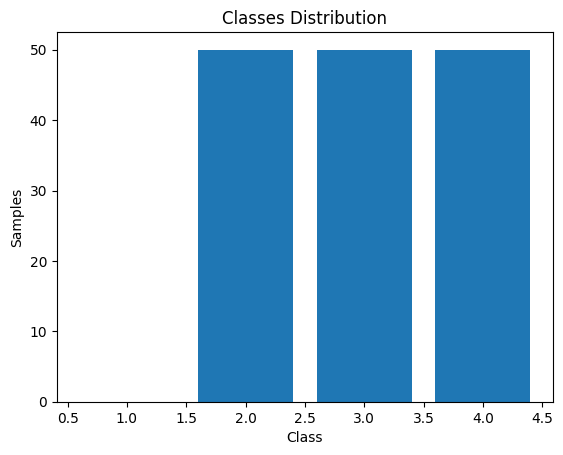

In [8]:
target_values = df_normalized.iloc[:,-1]
class_counts = np.bincount(target_values)
class_labels = np.arange(1, len(class_counts) + 1)

# Create the bar plot
plt.bar(class_labels, class_counts)

# Customize the plot
plt.xlabel('Class')
plt.ylabel('Samples')
plt.title('Classes Distribution')

# Display the plot
plt.show()

---
<a id="section35"></a>
 <font color="#004D7F" size=5> 3.5. Read Images</font>

Now, we read the created images 

In [9]:
imgs = pd.read_csv(img_paths)

#imgs["images"]= images_folder + "\\" + imgs["images"]
imgs["images"]= images_folder + "/" + imgs["images"]

combined_dataset = pd.concat([imgs,df_normalized[columns_to_normalize]],axis=1)
combined_dataset

df_x = combined_dataset.drop("class",axis=1)
df_y = combined_dataset["class"].replace(-1, 0)

df_x.head(2)

,images,SepalLength,SepalWidth,PetalLength,PetalWidth
0,../Synthetic_images/iris_Tinto/01/000000.png,0.222222,0.625000,0.067797,0.041667
1,../Synthetic_images/iris_Tinto/01/000001.png,0.166667,0.416667,0.067797,0.041667


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. Pre-modelling phase</font>

Once the data is ready, we load it into memory with an iterator in order to pass it to the CNN.

---
<a id="section41"></a>
# <font color="#004D7F" size=5> 4.1. Data curation</font>

Note that each method generates images of **different pixel size**. For example:
- `TINTO` method has a parameter that you can specify the size in pixels which by default is 20. 
- Other parameters such as `Combined` generates the size automatically and you must obtain them from the _shape_ of the images.

<div class="alert alert-block alert-info">

<i class="fa fa-info-circle" aria-hidden="true"></i>
You can see all information about TINTOlib documentation in [PyPI](https://tintolib.readthedocs.io/en/latest/installation.html)

Split in train/test/validation. 

Note that the partitioning of the images is also performed, in addition to the tabular data.

In [13]:
import cv2
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size = 0.40, random_state = SEED,stratify=df_y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.50, random_state = SEED, stratify=y_val)

X_train_num = X_train.drop("images",axis=1)
X_val_num = X_val.drop("images",axis=1)
X_test_num = X_test.drop("images",axis=1)

X_train_img = np.array([cv2.imread(img) for img in X_train["images"]])
X_val_img = np.array([cv2.imread(img) for img in X_val["images"]])
X_test_img = np.array([cv2.imread(img) for img in X_test["images"]])

"""X_train_img = np.array([cv2.resize(cv2.imread(img),(60,60)) for img in X_train["images"]])
X_val_img = np.array([cv2.resize(cv2.imread(img),(60,60)) for img in X_val["images"]])
X_test_img = np.array([cv2.resize(cv2.imread(img),(60,60)) for img in X_test["images"]])"""

n_class = df['Species'].value_counts().count()
attributes = len(X_train_num.columns)
print("Image shape",X_train_img[0].shape)
print("Attributes",attributes)
print("Classes",n_class)


Image shape (20, 20, 3)
Attributes 4
Classes 3


---
<a id="section42"></a>
 <font color="#004D7F" size=5> 4.2. Distribution</font>

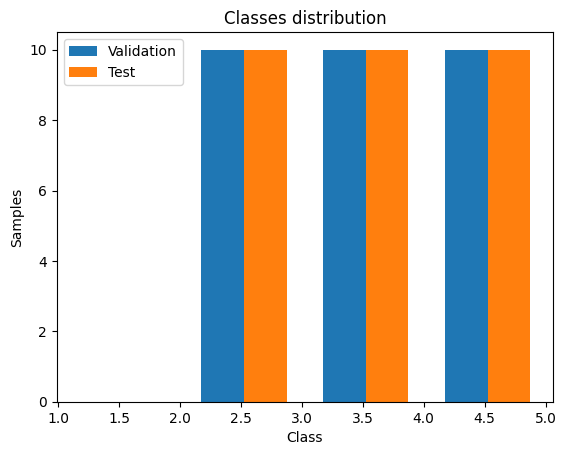

In [14]:
#SPLITS CLASS DISTRIBUTION

train_class_counts = np.bincount(y_train)
val_class_counts = np.bincount(y_val)
test_class_counts = np.bincount(y_test)

width = 0.35 
#plt.bar(class_labels, train_class_counts, width, label='Train')
plt.bar(class_labels + width, val_class_counts, width, label='Validation')
plt.bar(class_labels + width*2, test_class_counts, width, label='Test')

plt.xlabel('Class')
plt.ylabel('Samples')
plt.title('Classes distribution')
#plt.xticks(class_labels + width / 2, class_labels)
plt.legend()

# Mostrar el gráfico
plt.show()


In [15]:
y_train

32     1.0
66     2.0
97     2.0
42     1.0
24     1.0
      ... 
59     2.0
149    3.0
44     1.0
112    3.0
18     1.0
Name: class, Length: 90, dtype: float64

---
<a id="section43"></a>
 <font color="#004D7F" size=5> 4.3. One-Hot Encoding</font>

In [16]:
#ONE HOT ENCODING FOR MULTICLASS PROBLEMS
from tensorflow.keras.utils import to_categorical

# Adjusting class indices to start from 0 since to_categorical expects classes indexed from 0 to n_class-1,
# while original indices range from 1 to n_class.
y_train_oh =  to_categorical(y_train-1,n_class)
y_val_oh = to_categorical(y_val-1,n_class)
y_test_oh = to_categorical(y_test-1,n_class)

In [17]:
y_val_oh[0]

array([0., 1., 0.])

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Modeling hybrid network</font>

Now we can start the CNN+MLP training. Before that we prepare the algorithm for reading data.

In this example, 2 branch networks is created
- 1º branch: FFNN for tabular data
- 2º branch: CNN for TINTOlib images

---
<a id="section51"></a>
# <font color="#004D7F" size=5> 5.1. FFNN for tabular data</font>

This is an example of a simple FFNN for tabular data. Note that we are not looking for the optimization of the CNN but to show an example of TINTOlib execution.

In [18]:
dropout = 0.3

In [19]:
filters_ffnn = [1024,512,256,128,64,32,16]

ff_inputs = Input(shape = (attributes,))

# * START BRANCH 1
mlp_1 = Dense(128, activation='relu')(ff_inputs)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(64, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(32, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

mlp_1 = Dense(16, activation='relu')(mlp_1)
mlp_1 = BatchNormalization()(mlp_1)
mlp_1 = Dropout(dropout)(mlp_1)

ff_model = Model(inputs = ff_inputs, outputs = mlp_1)

2024-05-17 18:19:40.682472: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-05-17 18:19:40.682500: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-05-17 18:19:40.682503: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-05-17 18:19:40.682525: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-17 18:19:40.682537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


---
<a id="section52"></a>
# <font color="#004D7F" size=5> 5.2. CNN for TINTOlib images</font>

This is an example of a simple CNN for TINTOlib images. Note that we are not looking for the optimization of the CNN but to show an example of TINTOlib execution.

In [20]:
input_shape = Input(shape=(pixel, pixel, 3))

# CNN branch 1
tower_1 = Conv2D(16, (3,3), activation='relu',padding="same")(input_shape)
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
tower_1 = Dropout(dropout)(tower_1)

tower_1 = Conv2D(32, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
tower_1 = Dropout(dropout)(tower_1)

tower_1 = Conv2D(64, (3,3), activation='relu',padding="same")(tower_1)
tower_1 = BatchNormalization()(tower_1)
tower_1 = Activation('relu')(tower_1)
tower_1 = MaxPooling2D(2,2)(tower_1)
tower_1 = Dropout(dropout)(tower_1)

merged = Flatten()(tower_1)

out = Dense(128, activation='relu')(merged)
out = Dropout(dropout)(out)
out = Dense(64, activation='sigmoid')(out)
out = Dropout(dropout)(out)
out = Dense(32, activation='sigmoid')(out)
out = Dropout(dropout)(out)

cnn_model = Model(input_shape, out)

---
<a id="section53"></a>
# <font color="#004D7F" size=5> 5.3. Concatenate branches</font>

Finally, we must concatenate the output of the CNN branch with the output of the FFNN branch in a final FFNN that will give the predictions.

In [21]:
combinedInput = concatenate([ff_model.output, cnn_model.output])
x = Dense(64, activation="relu")(combinedInput)
x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Dense(64, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Dense(64, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(dropout)(x)
x = Dense(n_class, activation="softmax")(x)

model = Model(inputs=[ff_model.input, cnn_model.input], outputs=x)

---
<a id="section54"></a>
# <font color="#004D7F" size=5> 5.4. Metrics</font>

Define metrics and some hyperparameters

In [22]:
os.makedirs(results_folder, exist_ok=True)

# Redirect the summary output to the specified file
with open(results_folder+"/model_summary.txt", "w") as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

# Desactivar la visualización automática de matplotlib
plt.ioff()
# Now, you can also save the model plot
plot_model(model, to_file=results_folder+'model_plot.png', show_shapes=True, expand_nested=True)
# Reactivar la visualización automática de matplotlib (opcional)
plt.ion()

---
<a id="section55"></a>
# <font color="#004D7F" size=5> 5.5. Compile and fit</font>


In [23]:
METRICS = [
    #tf.keras.metrics.TruePositives(name = 'tp'),
    #tf.keras.metrics.FalsePositives(name = 'fp'),
    #tf.keras.metrics.TrueNegatives(name = 'tn'),
    #tf.keras.metrics.FalseNegatives(name = 'fn'), 
    tf.keras.metrics.CategoricalAccuracy(name ='accuracy'),
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall'),
    tf.keras.metrics.AUC(name = 'auc'),
]

In [36]:
#HYPERPARAMETERS
opt = Adam(learning_rate=1e-3)
model.compile(
    loss="categorical_crossentropy", 
    optimizer=opt,
    metrics = METRICS
)
epochs = 200

In [37]:
# Configure EarlyStopping for binary classification
early_stopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitor the validation accuracy
    min_delta=0.001,         # Minimum change in the monitored quantity to qualify as an improvement
    patience=20,             # Number of epochs with no improvement after which training will be stopped
    verbose=1,               # Log when training stops
    mode='max',              # Maximize the accuracy;
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [38]:
model_history=model.fit(
    x=[X_train_num, X_train_img/255], y=y_train_oh,
    validation_data=([X_val_num, X_val_img/255], y_val_oh),
    epochs=epochs , 
    batch_size=8,
    #steps_per_epoch = X_train_num.shape[0]//batch_size,
    #validation_steps = X_train_num.shape[0]//batch_size,
    callbacks=[early_stopper]
)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.3303 - auc: 0.5034 - loss: 1.5894 - precision: 0.3796 - recall: 0.1652 - val_accuracy: 0.5000 - val_auc: 0.5667 - val_loss: 1.1002 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.4472 - auc: 0.6628 - loss: 1.1836 - precision: 0.4667 - recall: 0.3807 - val_accuracy: 0.3333 - val_auc: 0.5806 - val_loss: 1.0945 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.4364 - auc: 0.6210 - loss: 1.3503 - precision: 0.4326 - recall: 0.3301 - val_accuracy: 0.3333 - val_auc: 0.5803 - val_loss: 1.0955 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.4544 - auc: 0.6685 - loss: 1.2566 - precision: 0.4524 - recall: 0.3884 - val_accuracy: 0.3333 - val_auc: 0.5408 - val_loss: 1.0993 - val_precision: 0.0000e+00 - val_recall: 0.0000e

In [39]:
print(model_history.history.keys())

dict_keys(['accuracy', 'auc', 'loss', 'precision', 'recall', 'val_accuracy', 'val_auc', 'val_loss', 'val_precision', 'val_recall'])


<a id="section6"></a>
# <font color="#004D7F" size=6> 6. Results</font>

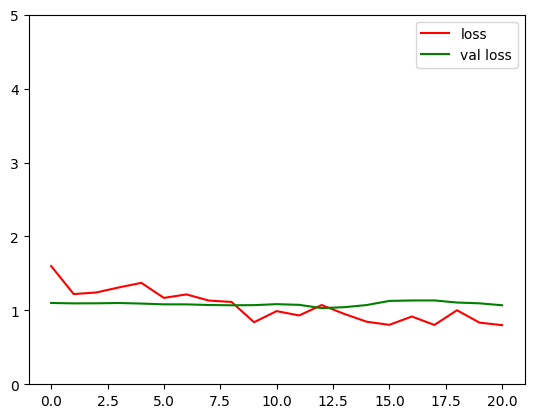

In [40]:
#print(model_history.history['loss'])
plt.plot(model_history.history['loss'], color = 'red', label = 'loss')
plt.plot(model_history.history['val_loss'], color = 'green', label = 'val loss')
plt.legend(loc = 'upper right')
plt.ylim(0,5)
plt.show()

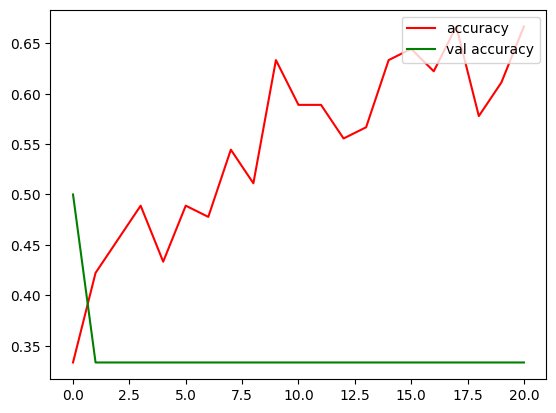

In [41]:
plt.plot(model_history.history['accuracy'], color = 'red', label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], color = 'green', label = 'val accuracy')
plt.legend(loc = 'upper right')
plt.show()

In [42]:
prediction = model.predict([X_test_num,X_test_img/255],)
real_values= y_test.values-1
predicted_classes = np.argmax(prediction, axis = 1)

result = [list(t) for t in zip(predicted_classes, real_values)]
#print(np.round(prediction))
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
[[1, 0.0], [2, 2.0], [1, 0.0], [1, 1.0], [1, 0.0], [1, 2.0], [1, 1.0], [1, 2.0], [1, 2.0], [2, 2.0], [1, 0.0], [1, 0.0], [1, 1.0], [1, 1.0], [1, 2.0], [1, 1.0], [1, 1.0], [2, 2.0], [1, 2.0], [1, 0.0], [1, 0.0], [1, 0.0], [1, 0.0], [1, 1.0], [1, 2.0], [1, 1.0], [1, 2.0], [1, 1.0], [1, 0.0], [1, 1.0]]


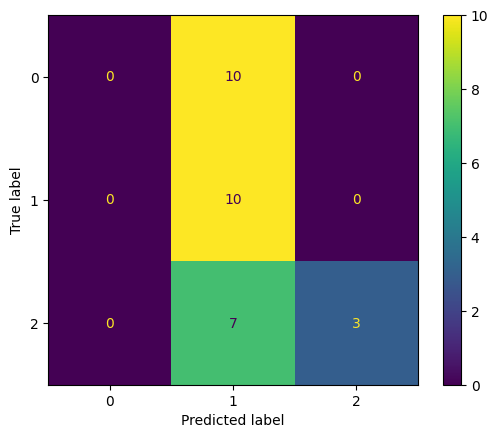

In [43]:
from sklearn.metrics import confusion_matrix
true_classes = real_values

cm = confusion_matrix(true_classes, predicted_classes)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()




In [44]:
report = sklearn.metrics.classification_report(true_classes, 
                                               predicted_classes)
print(report) 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.37      1.00      0.54        10
         2.0       1.00      0.30      0.46        10

    accuracy                           0.43        30
   macro avg       0.46      0.43      0.33        30
weighted avg       0.46      0.43      0.33        30



/Users/manwest/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manwest/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/manwest/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [45]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score, recall_score

test_accuracy = accuracy_score(true_classes, predicted_classes)
#test_auc = roc_auc_score(true_classes, predicted_classes)
#test_precision = precision_score(true_classes, predicted_classes)
#test_recall = recall_score(true_classes, predicted_classes)

print("Test accuracy:",test_accuracy)
#print("Test AUC:",test_auc)
#print("Test precision:",test_precision)
#print("Test recall:",test_recall)

Test accuracy: 0.43333333333333335


In [46]:
train_accuracy = model_history.history["accuracy"][-1]
train_auc = model_history.history["auc"][-1]
train_precision = model_history.history["precision"][-1]
train_recall = model_history.history["recall"][-1]
train_loss = model_history.history["loss"][-1]

print("Train accuracy:",train_accuracy)
print("Train AUC:",train_auc)
print("Train precision:",train_precision)
print("Train recall:",train_recall)
print("Train loss:",train_loss)

Train accuracy: 0.6666666865348816
Train AUC: 0.824104905128479
Train precision: 0.7027027010917664
Train recall: 0.5777778029441833
Train loss: 0.8000691533088684


In [47]:
validation_accuracy = model_history.history["val_accuracy"][-1]
validation_auc = model_history.history["val_auc"][-1]
validation_precision = model_history.history["val_precision"][-1]
validation_recall = model_history.history["val_recall"][-1]
validation_loss = model_history.history["val_loss"][-1]

print("Validation accuracy:",validation_accuracy)
print("Validation AUC:",validation_auc)
print("Validation precision:",validation_precision)
print("Validation recall:",validation_recall)
print("Validation loss:",validation_loss)

Validation accuracy: 0.3333333432674408
Validation AUC: 0.6355555653572083
Validation precision: 0.3448275923728943
Validation recall: 0.3333333432674408
Validation loss: 1.0687592029571533
